In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import os

# set working directory
os.chdir('C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files')



In [5]:
ky_well_locations = gpd.read_file('KY\\kyog_dd.shp')
print (ky_well_locations.head)

<bound method NDFrame.head of                    API  KGS_Recno Letter  Number  Section   FNS NS   FEW EW  \
0                 None          1      G      50        8  2030  S    60  W   
1       16001009480000          2      F      49        2   313  N   270  W   
2       16001037640000          3      F      49        2  2507  N  1299  W   
3       16001009490000          4      F      49        3   133  N   286  E   
4       16001019300000          5      F      49        3   550  S  2150  E   
5       16001013000000          6      F      49        8  2570  S  2290  W   
6       16001021200000          7      F      49        8  2570  N  2100  E   
7       16001026490000          8      F      49        8  2920  S   530  E   
8       16001026170000          9      F      49        8   400  S   190  E   
9       16001021030000         10      F      49        9  2720  S   880  W   
10      16001021040000         11      F      49        9  2190  N  1580  W   
11      16001021050000

In [8]:
print(ky_well_locations.type)

0         Point
1         Point
2         Point
3         Point
4         Point
5         Point
6         Point
7         Point
8         Point
9         Point
10        Point
11        Point
12        Point
13        Point
14        Point
15        Point
16        Point
17        Point
18        Point
19        Point
20        Point
21        Point
22        Point
23        Point
24        Point
25        Point
26        Point
27        Point
28        Point
29        Point
          ...  
152850    Point
152851    Point
152852    Point
152853    Point
152854    Point
152855    Point
152856    Point
152857    Point
152858    Point
152859    Point
152860    Point
152861    Point
152862    Point
152863    Point
152864    Point
152865    Point
152866    Point
152867    Point
152868    Point
152869    Point
152870    Point
152871    Point
152872    Point
152873    Point
152874    Point
152875    Point
152876    Point
152877    Point
152878    Point
152879    Point
Length: 152880, dtype: o

Let's see what these locations look like.

Text(0.5, 1, "Kentucky well data locations{'init': 'epsg:4269'}")

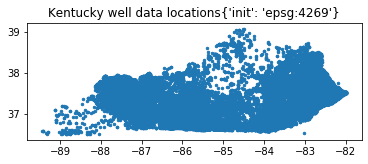

In [24]:
ky_wells_map = ky_well_locations.cx[:, :]

ky_map = ky_wells_map.plot(markersize=4)
ky_map.set_title('Kentucky well data locations' + str(ky_wells_map.crs))

Now check if there are any duplicate entries.

In [23]:
ky_tops_data = pd.read_csv('KY\\KY_TOPS\\KY_FM_Tops_Data_csv_update.csv')


duplicate_count = ky_tops_data.duplicated(subset=['record_number',
                                           'pick_fm_name',
                                           'fm_top_depth_ft',
                                           'comments',
                                           'source'], keep='first').sum()

print('total duplicate entries:',duplicate_count)

total duplicate entries: 287


In [ ]:
ky_tops_data.drop_duplicates(subset=['record_number',
                                           'pick_fm_name',
                                           'fm_top_depth_ft',
                                           'comments',
                                           'source'], keep='first', inplace=True)